<a href="https://colab.research.google.com/github/aparnaashok2125/Cognifyz-ML-Internship/blob/main/Task_4_Location_based_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [2]:
# Upload & Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))

Saving Dataset .csv to Dataset .csv


In [3]:
# Basic Cleanup: Drop missing values in important location fields
df = df.dropna(subset=['Latitude', 'Longitude', 'City'])

In [4]:
# Visualize Restaurant Distribution on Map
# Use a sample for speed if dataset is large
map_data = df[['Restaurant Name', 'City', 'Latitude', 'Longitude']].sample(n=500, random_state=1)

# Create map centered in India (or adjust based on your data)
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
marker_cluster = MarkerCluster().add_to(m)

for idx, row in map_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']} ({row['City']})"
    ).add_to(marker_cluster)

m


<ipython-input-5-1b5bd135a39d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')


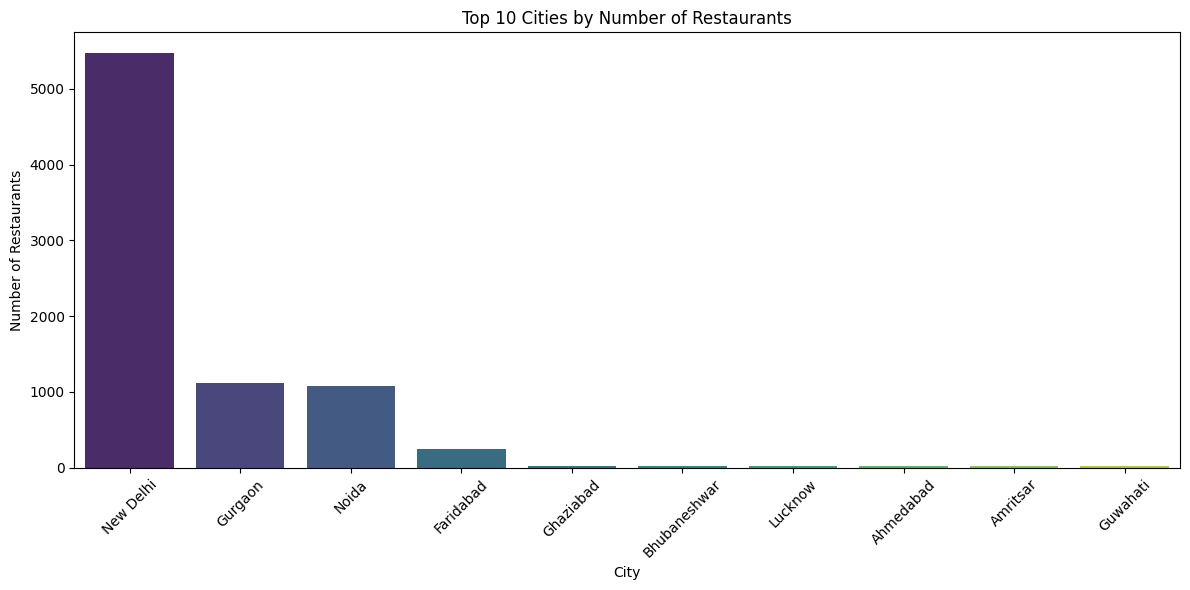

In [5]:
# Number of Restaurants per City
plt.figure(figsize=(12,6))
top_cities = df['City'].value_counts().nlargest(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title("Top 10 Cities by Number of Restaurants")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-6-29d78829ba68>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='magma')


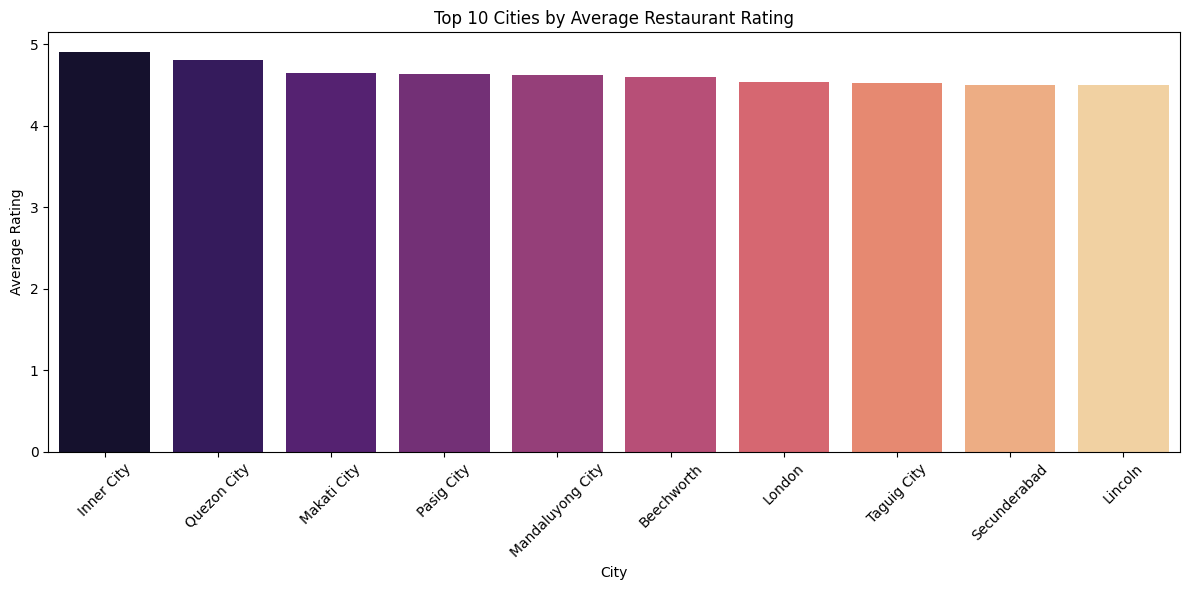

In [6]:
# Average Rating by City (Top 10)
avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='magma')
plt.title("Top 10 Cities by Average Restaurant Rating")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-7-57bd31dea9b7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='coolwarm')


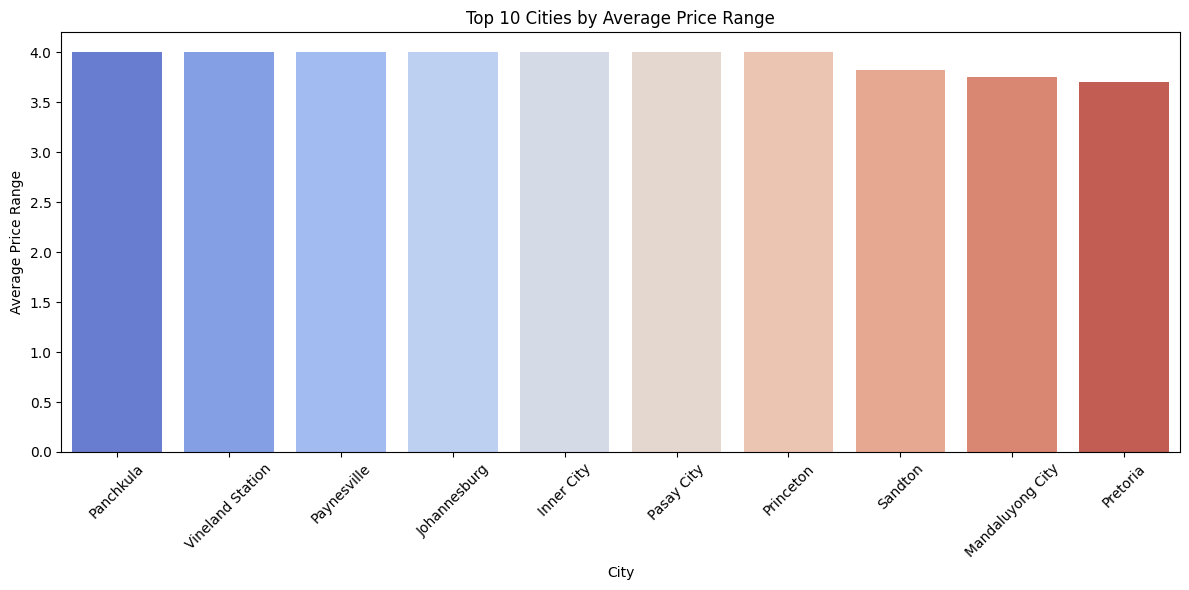

In [7]:
# Average Price Range by City
avg_price = df.groupby('City')['Price range'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='coolwarm')
plt.title("Top 10 Cities by Average Price Range")
plt.ylabel("Average Price Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Most Common Cuisine by City
top_cuisine_by_city = df.groupby('City')['Cuisines'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else "N/A")
print("\nMost Common Cuisine in Each City:")
print(top_cuisine_by_city.head(10))


Most Common Cuisine in Each City:
City
Abu Dhabi                                            American
Agra                                    North Indian, Mughlai
Ahmedabad    Cafe, American, Continental, Armenian, Fast Food
Albany                                 Japanese, Steak, Sushi
Allahabad                               North Indian, Chinese
Amritsar                                         North Indian
Ankara                                   Kebab, Turkish Pizza
Armidale                                      Bar Food, Steak
Athens                               American, Italian, Pizza
Auckland                                                 Cafe
Name: Cuisines, dtype: object
